

# Top European Soccer Players (2008 to 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

The dataset for the following analysis is provided on [kaggle](https://www.kaggle.com/datasets/hugomathien/soccer). The soccer database is viewable via DB Browser for SQLite. Tables that are joined for the analysis from the soccer database include Player and Player_Attributes. The aforementioned tables join player name, height, and weight with player attributes such as overall rating, preferred foot, and birthday. Player overall rating is an average of a specific player over a specfic period of time. This allows for a quick view of the top players during the given period.   


Particular questions for this dataset include: Who was the top player during the given time period? What commonalities do the top 50 players share? Lastly, what percentage of the top 100 players prefer their left foot when striking? 

In [30]:
#http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 




# Importing the Data

Accessing the data begins with reading the data from our database into a dataframe. Once the data is in a dataframe, we can view the first several rows and get an idea of what our data looks like and if there needs to be any cleaning done. 

In [31]:
df = pd.read_csv("top_players.csv")
df.head(25)

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
2,Neymar,175.26,150,84.0,right,1992-02-05 00:00:00
3,Manuel Neuer,193.04,203,86.0,right,1986-03-27 00:00:00
4,Luis Suarez,182.88,187,85.0,right,1987-01-24 00:00:00
5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03 00:00:00
6,Arjen Robben,180.34,176,88.0,left,1984-01-23 00:00:00
7,Thiago Silva,182.88,174,84.0,right,1984-09-22 00:00:00
8,Sergio Aguero,172.72,163,86.0,right,1988-06-02 00:00:00
9,Robert Lewandowski,185.42,174,83.0,right,1988-08-21 00:00:00



# Data Cleaning

After printing out the first 25 rows of the data, it can be seen that the Overall_Rating column isn't quite ordered correctly. This will require some cleaning to order and sort the data by this particular column. Additionally, the birthday column has a timestamp which is not populated with relevant data. We will end up keeping the date and deleting the timestamp for entries in the birthday column. 

But first, let's check for duplicate data and missing values. 
 

In [32]:
df.isnull().any()

player_name       False
height            False
weight            False
Overall Rating    False
preferred_foot    False
birthday          False
dtype: bool

In [33]:
df.isnull()

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10843,False,False,False,False,False,False
10844,False,False,False,False,False,False
10845,False,False,False,False,False,False
10846,False,False,False,False,False,False


After performing the first check of the dataframe, no null values were found across each column or the dataframe as a whole. 

Next, the dataframe will be checked for duplicate data. 

In [34]:
df.drop_duplicates()

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
2,Neymar,175.26,150,84.0,right,1992-02-05 00:00:00
3,Manuel Neuer,193.04,203,86.0,right,1986-03-27 00:00:00
4,Luis Suarez,182.88,187,85.0,right,1987-01-24 00:00:00
...,...,...,...,...,...,...
10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13 00:00:00
10844,Liam Hughes,177.80,150,46.0,right,1988-09-11 00:00:00
10845,Emir Sinanovic,180.34,154,48.0,left,1988-10-24 00:00:00
10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19 00:00:00


In [35]:
df2 = df.sort_values(by=['Overall Rating'], ascending=False)
df2.head(25)

,player_name,height,weight,Overall Rating,preferred_foot,birthday
0,Lionel Messi,170.18,159,92.0,left,1987-06-24 00:00:00
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05 00:00:00
21,Xavi Hernandez,170.18,148,88.0,right,1980-01-25 00:00:00
5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03 00:00:00
6,Arjen Robben,180.34,176,88.0,left,1984-01-23 00:00:00
12,Andres Iniesta,170.18,150,88.0,right,1984-05-11 00:00:00
33,Franck Ribery,170.18,159,88.0,right,1983-04-07 00:00:00
160,Iker Casillas,185.42,185,87.0,left,1981-05-20 00:00:00
40,Wayne Rooney,175.26,183,87.0,right,1985-10-24 00:00:00
35,David Silva,170.18,148,87.0,left,1986-01-08 00:00:00


In [36]:
df2['Birthday_New'] = pd.to_datetime(df2['birthday']).dt.date


In [37]:
cleaned_df = df2.drop('birthday', axis=1)

In [38]:
cleaned_df

,player_name,height,weight,Overall Rating,preferred_foot,Birthday_New
0,Lionel Messi,170.18,159,92.0,left,1987-06-24
1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05
21,Xavi Hernandez,170.18,148,88.0,right,1980-01-25
5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03
6,Arjen Robben,180.34,176,88.0,left,1984-01-23
...,...,...,...,...,...,...
10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19
9928,Boubacar Mansaly,175.26,150,45.0,right,1988-02-04
10706,Badis Lebbihi,180.34,176,45.0,left,1990-03-14
10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13


In [39]:
cleaned_df.reset_index(inplace=True)
cleaned_df

,index,player_name,height,weight,Overall Rating,preferred_foot,Birthday_New
0,0,Lionel Messi,170.18,159,92.0,left,1987-06-24
1,1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05
2,21,Xavi Hernandez,170.18,148,88.0,right,1980-01-25
3,5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03
4,6,Arjen Robben,180.34,176,88.0,left,1984-01-23
...,...,...,...,...,...,...,...
10843,10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19
10844,9928,Boubacar Mansaly,175.26,150,45.0,right,1988-02-04
10845,10706,Badis Lebbihi,180.34,176,45.0,left,1990-03-14
10846,10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13


In [42]:
cleaned_df.drop(['index'], axis=1, inplace=True)


In [41]:
cleaned_df

,index,player_name,height,weight,Overall Rating,preferred_foot,Birthday_New
0,0,Lionel Messi,170.18,159,92.0,left,1987-06-24
1,1,Cristiano Ronaldo,185.42,176,91.0,right,1985-02-05
2,21,Xavi Hernandez,170.18,148,88.0,right,1980-01-25
3,5,Zlatan Ibrahimovic,195.58,209,88.0,right,1981-10-03
4,6,Arjen Robben,180.34,176,88.0,left,1984-01-23
...,...,...,...,...,...,...,...
10843,10846,Benjamin Fischer,175.26,157,46.0,right,1980-10-19
10844,9928,Boubacar Mansaly,175.26,150,45.0,right,1988-02-04
10845,10706,Badis Lebbihi,180.34,176,45.0,left,1990-03-14
10846,10843,Gianluca D'Angelo,175.26,139,44.0,left,1991-03-13


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [43]:
preferred_foot_array = np.array(cleaned_df['preferred_foot'])

In [44]:
lfoot = 0
rfoot = 0 

for i in preferred_foot_array:
    if i == 'left':
        lfoot += 1
    else:
        rfoot += 1

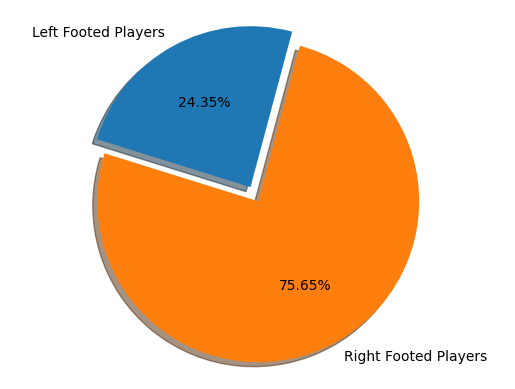

In [45]:
lbl = ['Left Footed Players', 'Right Footed Players']
vals = [lfoot, rfoot]
explode = [0, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(vals, explode=explode, labels=lbl, autopct='%1.2f%%', shadow=True, startangle=75)
ax1.axis('equal')
plt.show()

In [46]:
df = cleaned_df.groupby('preferred_foot').sum('Overall Rating')

In [47]:
df['foot_count'] = lfoot,rfoot

In [48]:
df.drop(['height', 'weight'], axis=1, inplace=True)

In [49]:
df['avg_rating'] = (df['Overall Rating'] / df['foot_count']).round(2)

### Research Question 2  (Replace this header name!)

In [50]:
df

,Overall Rating,foot_count,avg_rating
preferred_foot,,,
left,176364.0,2642,66.75
right,548496.0,8206,66.84


In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

### Limitation
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])